In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from datetime import *
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns


In [ ]:

store = pd.read_csv("stores_final.csv")
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_nbr   54 non-null     int64 
 1   city        54 non-null     object
 2   state       54 non-null     object
 3   type        54 non-null     object
 4   cluster     54 non-null     int64 
 5   Populaiton  54 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.7+ KB


In [ ]:
store_testDummies = pd.get_dummies(store ["type"])
store =pd.concat([store,store_testDummies],axis=1)
store.head()

,store_nbr,city,state,type,cluster,Populaiton,A,B,C,D,E
0,23,Ambato,Tungurahua,D,9,"154,369",0,0,0,1,0
1,50,Ambato,Tungurahua,A,14,"154,369",1,0,0,0,0
2,31,Babahoyo,Los Rios,B,10,"76,279",0,1,0,0,0
3,11,Cayambe,Pichincha,B,6,"26,582",0,1,0,0,0
4,37,Cuenca,Azuay,D,2,"276,964",0,0,0,1,0


added dummy variables to orginal dataset(store), to be able to see store types in each city 

In [ ]:
store['Populaiton']=store['Populaiton'].str.replace(',','').astype(int)
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_nbr   54 non-null     int64 
 1   city        54 non-null     object
 2   state       54 non-null     object
 3   type        54 non-null     object
 4   cluster     54 non-null     int64 
 5   Populaiton  54 non-null     int64 
 6   A           54 non-null     uint8 
 7   B           54 non-null     uint8 
 8   C           54 non-null     uint8 
 9   D           54 non-null     uint8 
 10  E           54 non-null     uint8 
dtypes: int64(3), object(3), uint8(5)
memory usage: 2.9+ KB


changed object type of population to int type 

In [ ]:
enc_city = OrdinalEncoder()
store[['city','state']]= enc_city.fit_transform(store[['city','state']])
store.head()

,store_nbr,city,state,type,cluster,Populaiton,A,B,C,D,E
0,23,0.0,15.0,D,9,154369,0,0,0,1,0
1,50,0.0,15.0,A,14,154369,1,0,0,0,0
2,31,1.0,9.0,B,10,76279,0,1,0,0,0
3,11,2.0,12.0,B,6,26582,0,1,0,0,0
4,37,3.0,0.0,D,2,276964,0,0,0,1,0


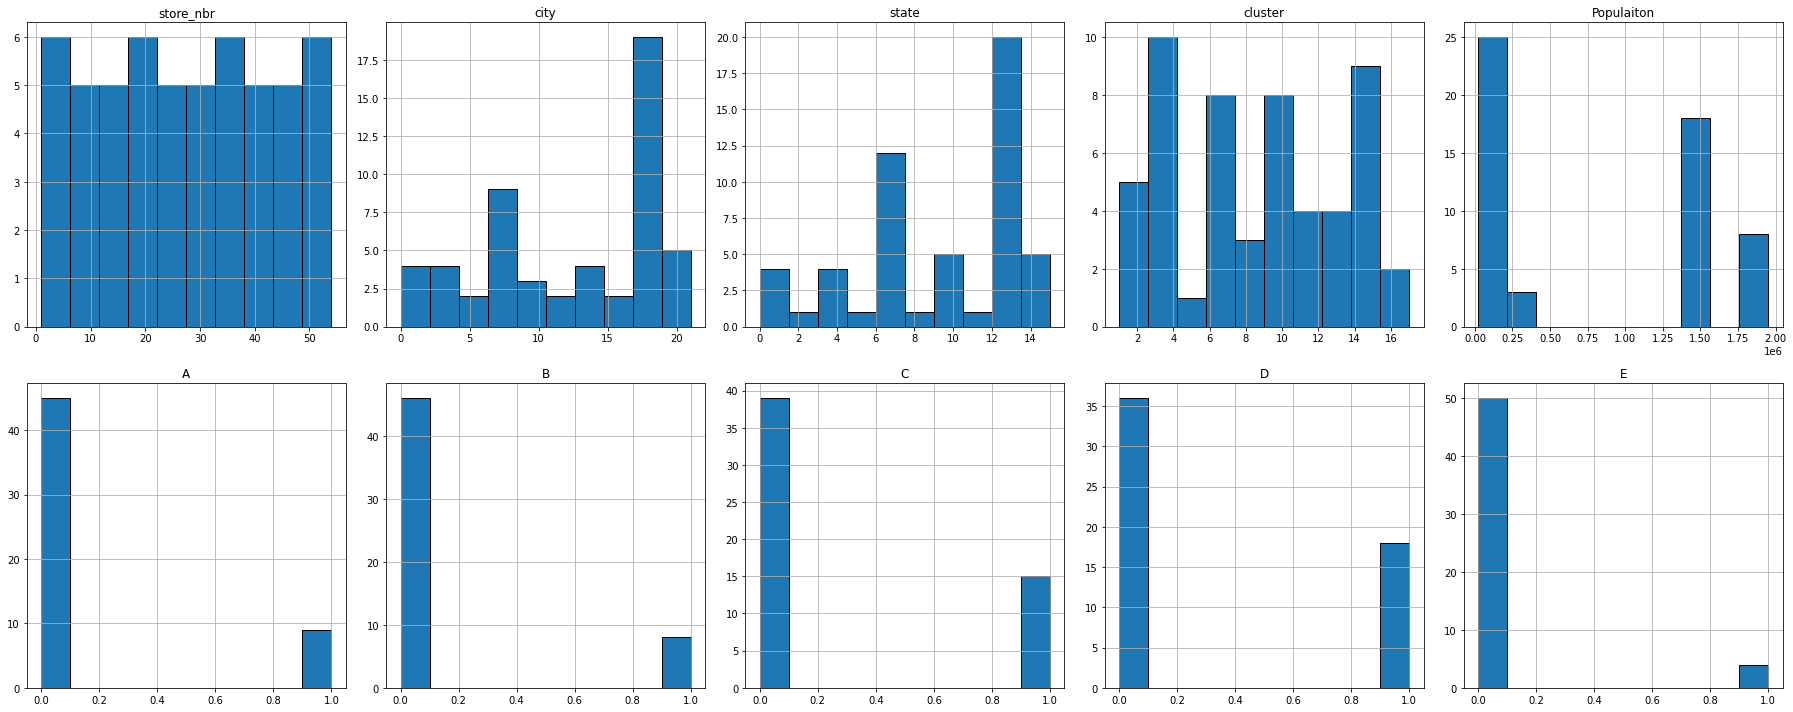

In [ ]:
store.hist(bins=10,figsize= (25,10),layout=(-1,5),edgecolor="black")
plt.tight_layout()

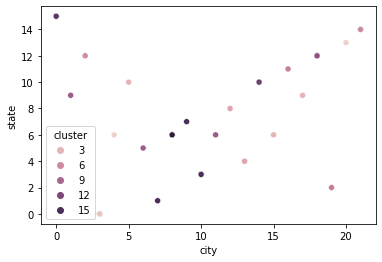

In [ ]:
sns.scatterplot(data=store,x="city",y="state",hue="cluster")

clustering is not based on geographical position of the stores

In [ ]:
store.drop('type',inplace = True)

KeyError: ignored

no use to type column anymore


In [ ]:
store['store_nbr'].is_unique

True

no duplicates


In [ ]:
store.head()


,store_nbr,city,state,type,cluster,Populaiton,A,B,C,D,E
0,23,0.0,15.0,D,9,154369,0,0,0,1,0
1,50,0.0,15.0,A,14,154369,1,0,0,0,0
2,31,1.0,9.0,B,10,76279,0,1,0,0,0
3,11,2.0,12.0,B,6,26582,0,1,0,0,0
4,37,3.0,0.0,D,2,276964,0,0,0,1,0


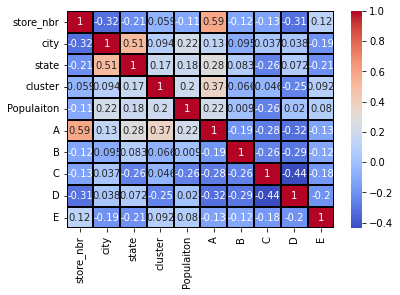

In [ ]:
store_check= store.corr()
#sns.heatmap(store_check,xticklabels=store_check.columns,yticklabels=store_check.columns,annot=True)
sns.heatmap(store_check,annot=True,cmap ='coolwarm',linecolor='black',linewidths=1)

nothing of major importance in terms of corrolation was found.

In [ ]:
store.to_csv('stores_final.csv')